<a href="https://colab.research.google.com/github/AllanKamimura/AI/blob/master/Regress%C3%A3o_Linear_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear com TensorFlow

## Grafico simples

In [61]:
# importa as bibliotecas 
import numpy as np # numeros do python
import tensorflow as tf # machine learning
import matplotlib.pyplot as plt # desenhar graficos

In [83]:
# valores para fazer a regressão
x_l = np.array([1, 2, 3, 4, 5], dtype = float)
y_l = np.array([3, 5, 7, 9, 11], dtype = float)

In [86]:
# criando o modelo

# 1) passa uma lista com os layers do seu modelo, cada layer tem o seu numero de units
# pra adicionar outro layer, é como itens de uma lista, coloca virgula e escreve o proximo
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 1, input_shape = [1], name = "jonas")
                             ])

# 2) como calcular o erro do seu modelo (loss) e como melhorar, diminuir esse erro (optimizer)
model.compile(loss = "mse", optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01))

# 3) colocando os dados no modelo
model.fit(x = x_l, y = y_l, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 209ms/step - loss: 14.3439
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 8.3962
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 4.9300
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 2.9098
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 1.7323
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0458
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6456
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4121
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2758
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1961
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1494
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1220
Epoch 13/100
1/1 [==============================] - 0s 3ms

In [87]:
# vendo os resultados do modelo, os valores esperados são os y_l
# obs: mesmo que so tenha um x que voce queira ver, os valores são passados dentro de uma lista
model.predict([1, 2, 3, 4, 5])

array([[ 2.63567  ],
       [ 4.775243 ],
       [ 6.9148154],
       [ 9.054389 ],
       [11.193962 ]], dtype=float32)

In [88]:
# vendo os valores alem do x's que voce ja tinha
model.predict([6, 7, 8, 9, 10])

array([[13.333534],
       [15.473107],
       [17.61268 ],
       [19.752253],
       [21.891827]], dtype=float32)

In [89]:
# pegando os coeficientes da reta, angular (w) e linear (b)
w, b = model.get_layer("jonas").get_weights()

# os valores na verdade estão dentro de uma matriz, para retornar o numero e não a matriz, usa-se a função np.squeeze
w = np.squeeze(w)
b = np.squeeze(b)

print(w, b)

2.1395729 0.49609715


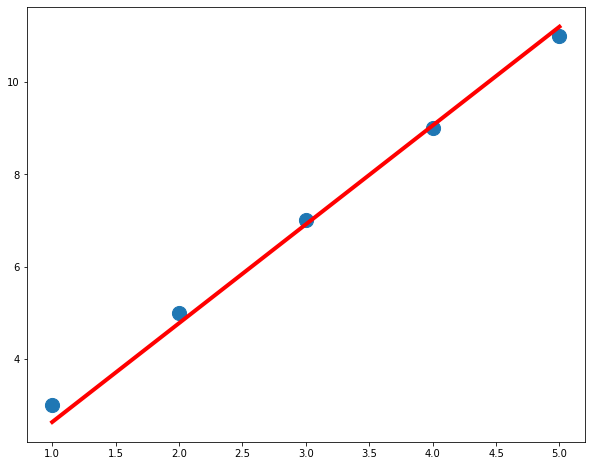

In [90]:
plt.figure( figsize = (10,8)) # desenha o grafico vazio com os eixos x e y
plt.scatter(x_l, y_l, s = 200) # desenha as bolinhas, "s" é o tamanho, pra mudar a cor, usa o "color"

# pega os valores maximos e minimos da lista x_l e cria uma nova lista com 50 valores entre esses extremos
xlinha = np.linspace(np.amin(x_l), np.amax(x_l), 50)

# list comprehension, para cada valor x dentro de xlinha, fazer a conta w * x + b e adicionar a lista ylinha
ylinha = [w * x + b for x in xlinha]

# desenha uma reta
plt.plot(xlinha, ylinha, linewidth = 4, color = "red")

# mostra o desenho completo
plt.show()

## Desenhar o grafico a cada interação e salvar

In [91]:
# valores para fazer a regressão
x_l = np.array([1, 2, 3, 4, 5], dtype = float)
y_l = np.array([3, 5, 7, 9, 11], dtype = float)

In [69]:
# cria a pasta grafico dentro de content
!mkdir /content/grafico/

mkdir: cannot create directory ‘/content/grafico/’: File exists


In [92]:
# função de desenhar graficos
def draw_graph(x_l, y_l, w, b, batch, logs):
    plt.figure( figsize = (10,8)) # desenha o grafico vazio com os eixos x e y
    plt.scatter(x_l, y_l, s = 200) # desenha as bolinhas, "s" é o tamanho, pra mudar a cor, usa o "color"

    # pega os valores maximos e minimos da lista x_l e cria uma nova lista com 50 valores entre esses extremos
    xlinha = np.linspace(np.amin(x_l), np.amax(x_l), 50)

    # list comprehension, para cada valor x dentro de xlinha, fazer a conta w * x + b e adicionar a lista ylinha
    ylinha = [w * x + b for x in xlinha]

    # desenha uma reta
    plt.plot(xlinha, ylinha, linewidth = 4, color = "red")

    # colocar titulo no grafico
    batch_number = str(batch).zfill(3) # transforma a string "3" em "003", por exemplo
    loss = logs["loss"] # dentro dos logs, pega o valor da perda
    plt.title("Epoch: {}, Loss: {}".format(batch_number, loss), color = "green")

    # salva a figura com o nome sendo o numero da epoca
    plt.savefig("/content/grafico/{}.png".format(batch_number))

    # mostra o desenho completo
    plt.show()

In [93]:
# criando um callback
class CustomCallback( tf.keras.callbacks.Callback):
    # executa essa função toda vez que uma epoca acab
    def on_epoch_end(self, batch, logs): # batch é o numero da epoca e logs é um dicionario com valores como o "loss"
        w, b = model.get_layer("jonas").get_weights()

        w = np.squeeze(w)
        b = np.squeeze(b)

        print(w, b)

        draw_graph(x_l, y_l, w, b, batch, logs)

In [ ]:
# criando o modelo

# 1) passa uma lista com os layers do seu modelo, cada layer tem o seu numero de units
# pra adicionar outro layer, é como itens de uma lista, coloca virgula e escreve o proximo
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 1, input_shape = [1], name = "jonas")
                             ])

# 2) como calcular o erro do seu modelo (loss) e como melhorar, diminuir esse erro (optimizer)
model.compile(loss = "mse", optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01))

# 3) colocando os dados no modelo
model.fit(x = x_l, y = y_l, epochs = 100, verbose = 0, callbacks = [CustomCallback()])

In [98]:
# criar o GIF
import os
import imageio

imageio.plugins.freeimage.download()

graph_list = os.listdir("/content/grafico") # lista de arquivos dentro da pasta
graph_list = sorted(graph_list) # coloca os arquivos em ordem alfabetica

images = []

for image_file in graph_list: # pra cada arquivo dentro da pasta,
    image = imageio.imread("/content/grafico/" + image_file) # ler o arquivo e armazenar em uma variavel
    images.append(image) # adicionar a image à lista de imagens

imageio.mimsave("/content/image.gif", images, "GIF-FI", fps = 10) # fazer um GIF com a lista de imagens

## Utilizando dados reais:
california housing prices mostra informações sobre as casas em varios quarteirões

In [99]:
import pandas as pd
df = pd.read_csv("/content/sample_data/california_housing_test.csv") # le o CSV, tipo um excel
df.head() # mostra as 5 primeiras linhas da tabela

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [100]:
df.corr() # valores proximos de 1, indicam que o grafico das 2 grandezas é proximo de uma reta

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


In [101]:
x_l = df["total_bedrooms"]
y_l = df["households"] 

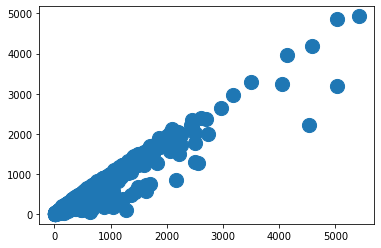

In [102]:
plt.scatter(x_l, y_l, s = 200)
plt.show()

-0.43614975 0.09228343


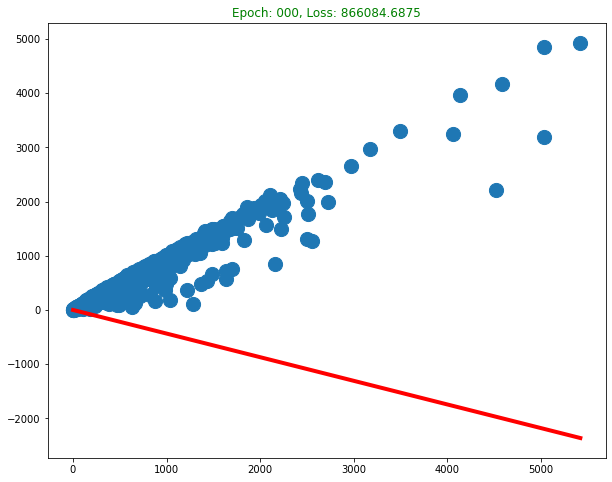

-0.3563662 0.18187839


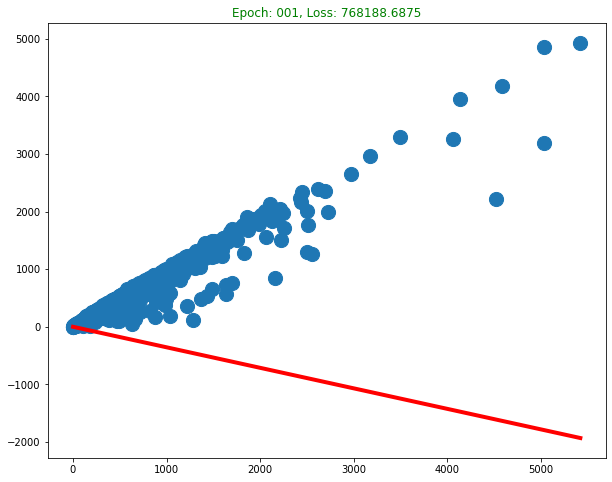

-0.2778461 0.26857138


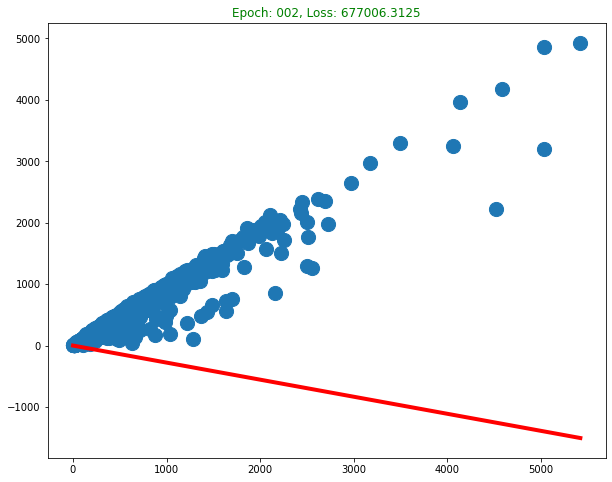

-0.2014 0.3527122


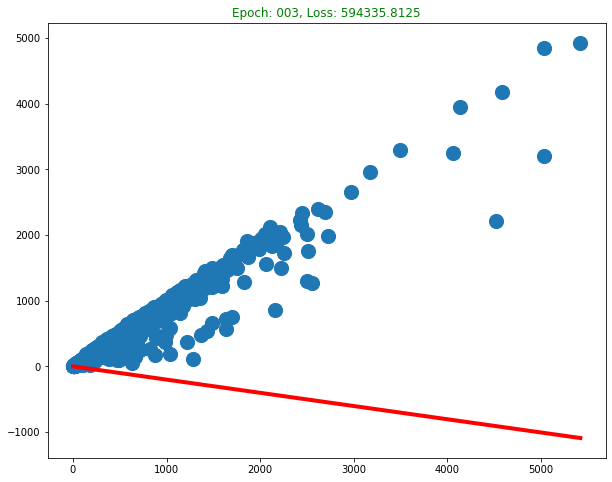

-0.12741357 0.4342757


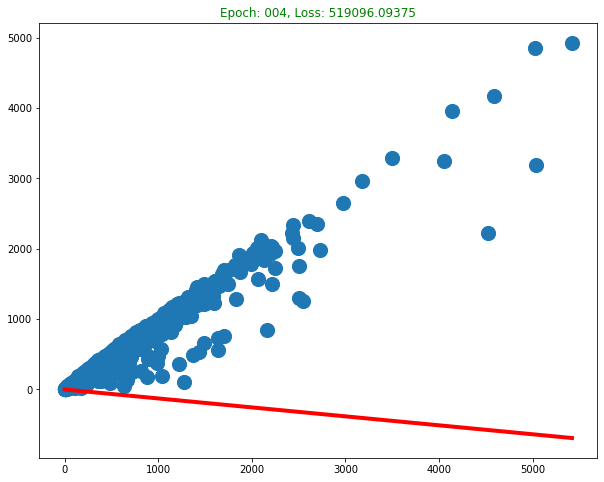

-0.054978557 0.5132771


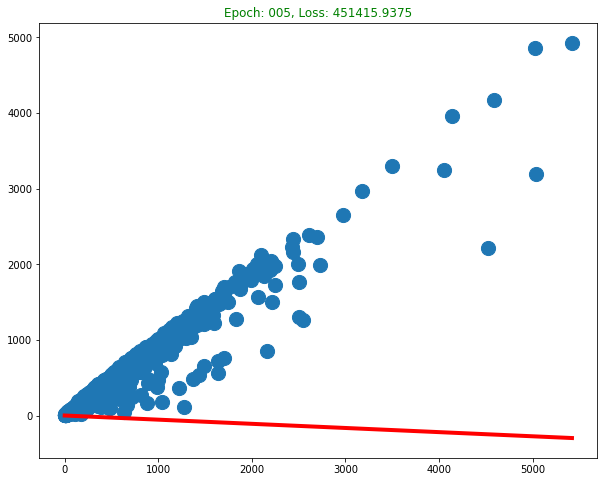

0.012983578 0.5887181


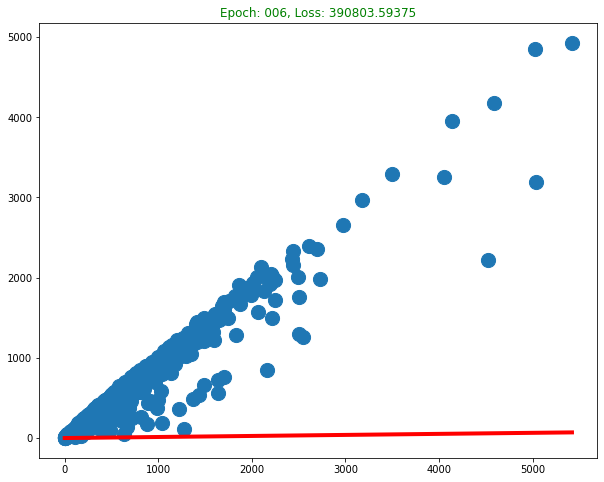

0.08032727 0.6623435


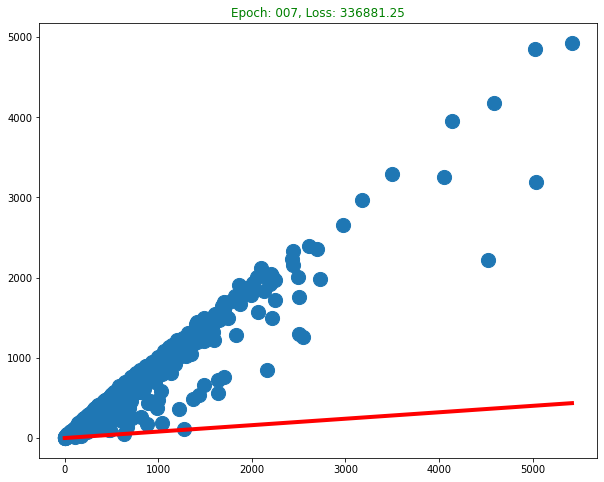

0.14160755 0.73182887


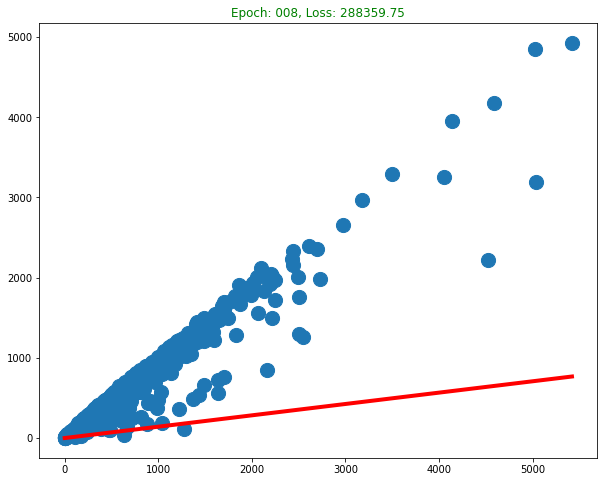

0.20322755 0.79958093


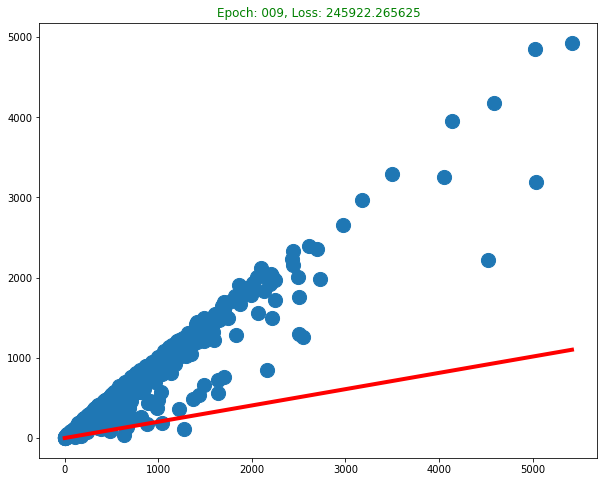

0.260804 0.86392236


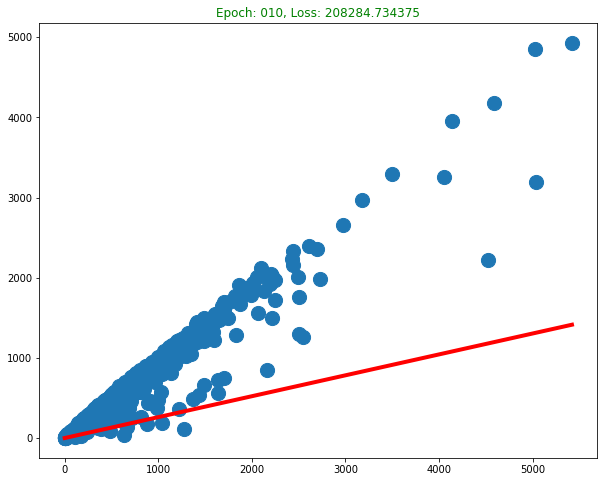

0.31742924 0.9261113


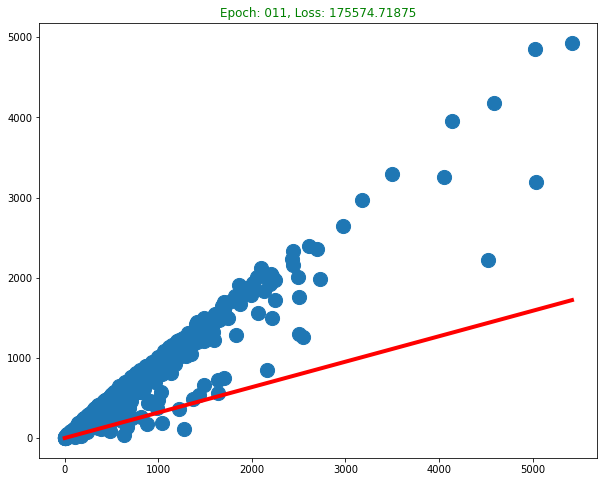

0.36983442 0.98463774


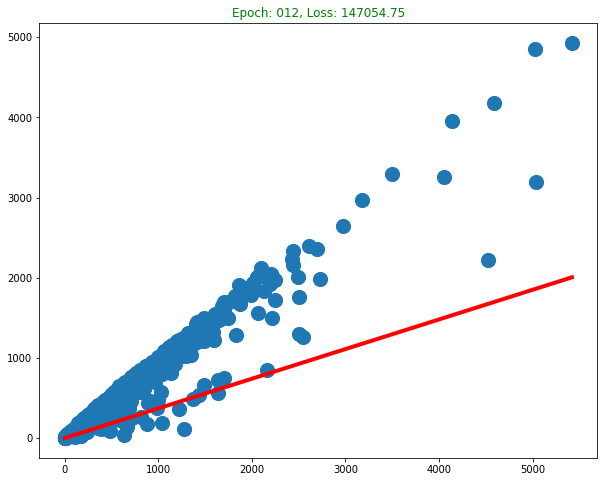

0.4196981 1.0404211


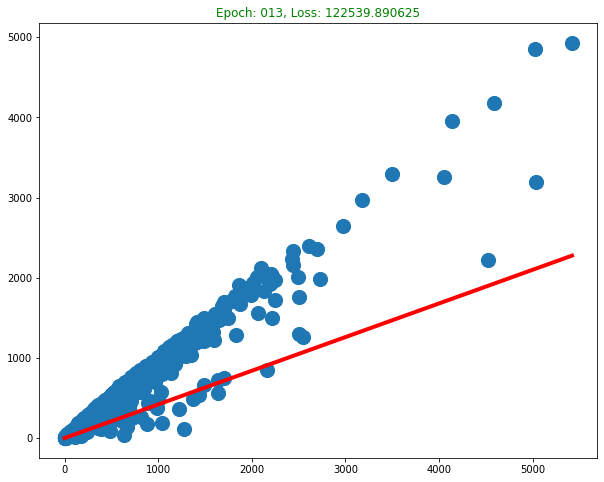

0.46638387 1.0933598


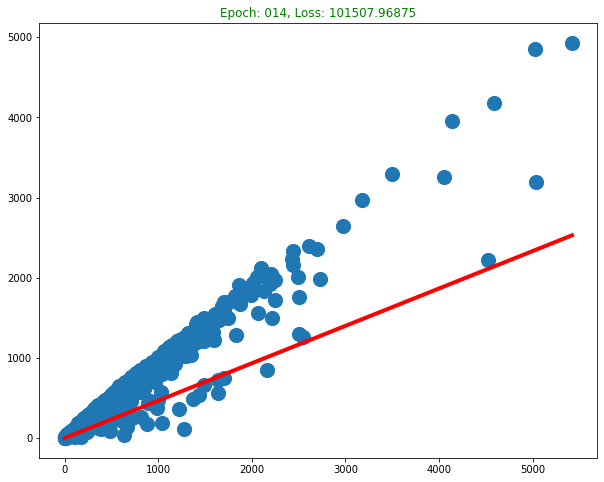

0.5107875 1.1433148


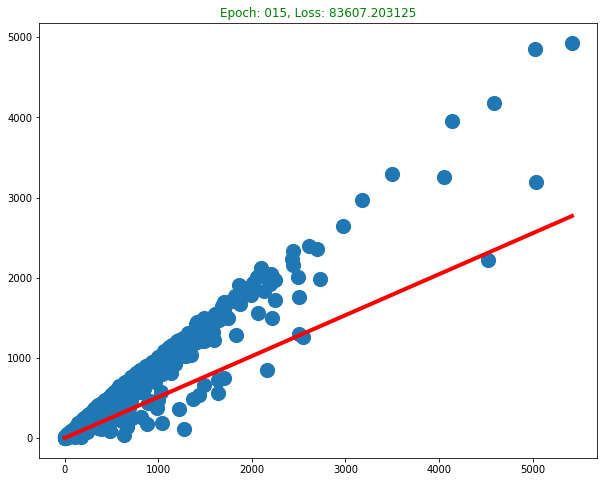

0.5525852 1.1906562


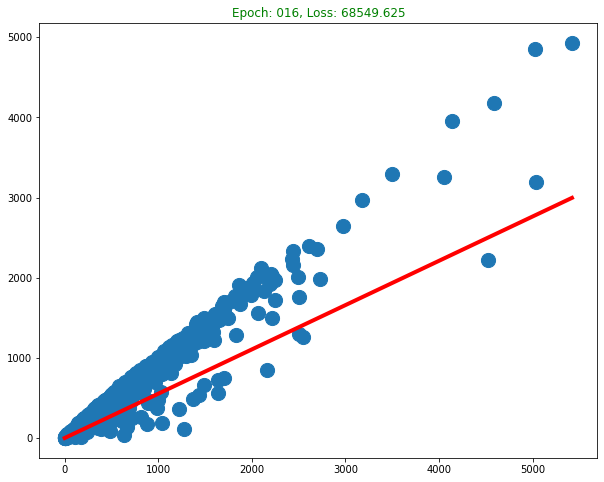

0.5910965 1.2347642


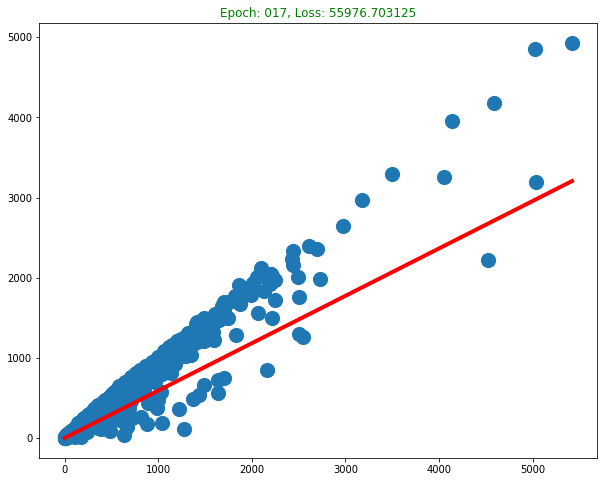

0.6268494 1.2761662


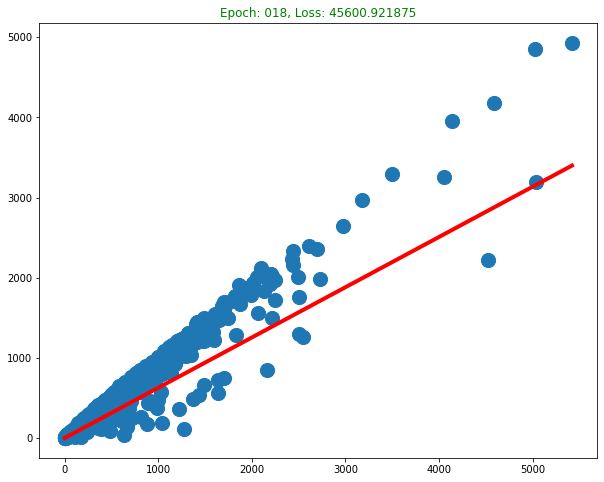

0.659902 1.3146815


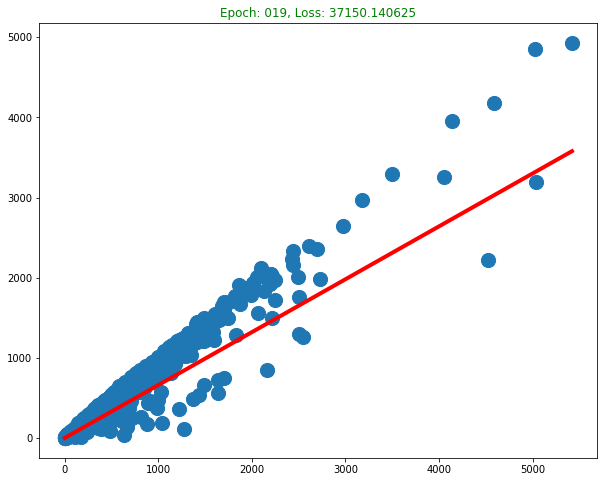

0.6902059 1.3505393


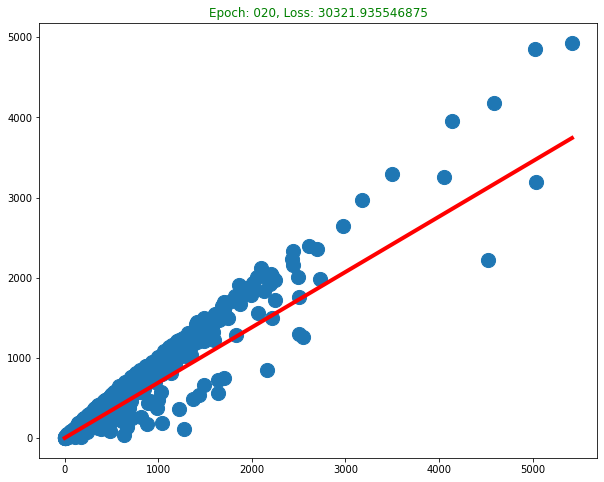

0.71832573 1.3838432


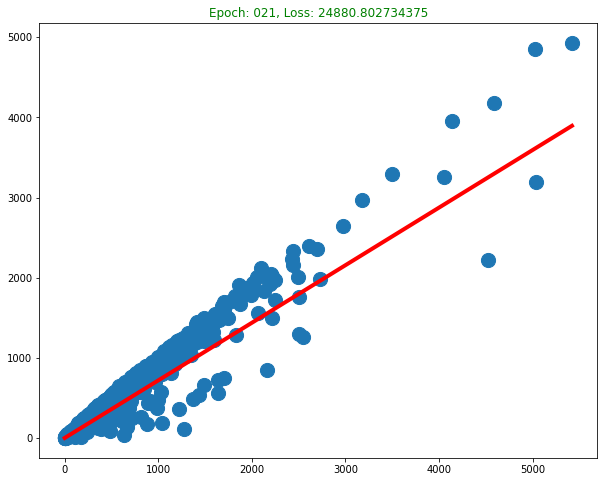

0.74333185 1.4142194


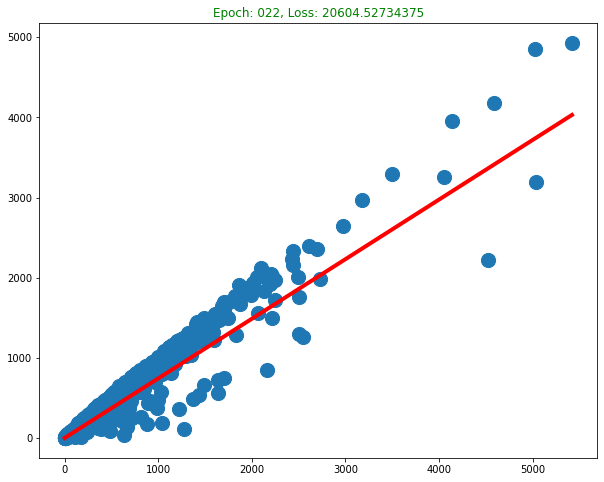

0.76567155 1.4421695


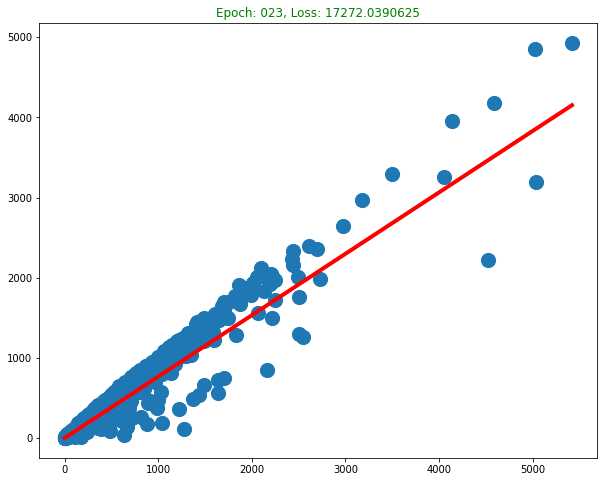

0.78568405 1.4679706


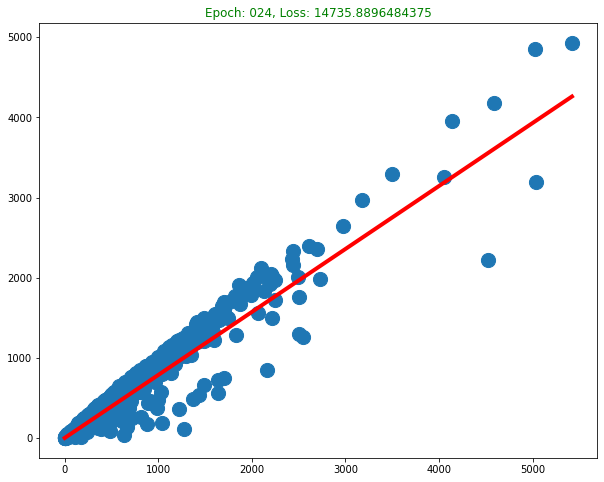

0.803565 1.4913433


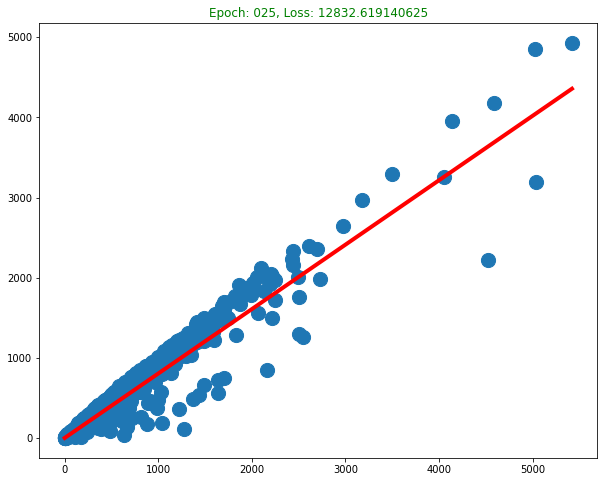

0.81978136 1.5129837


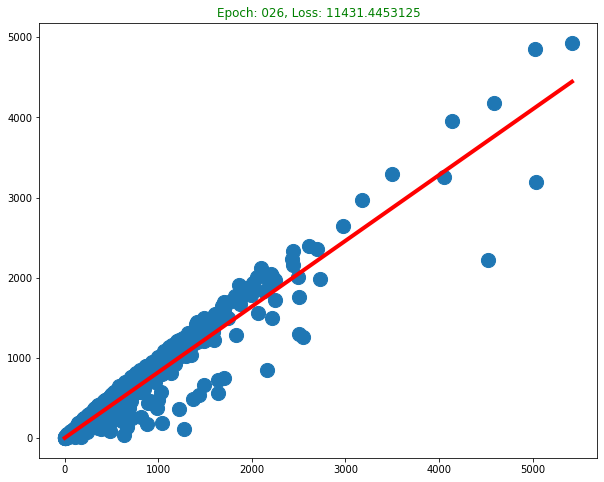

0.832917 1.5322039


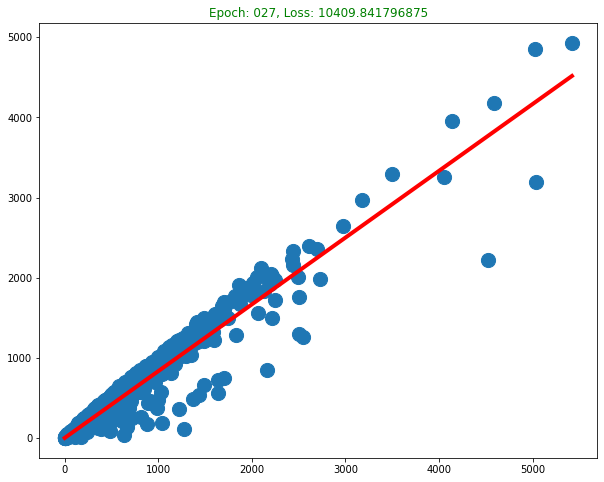

0.84457904 1.5497192


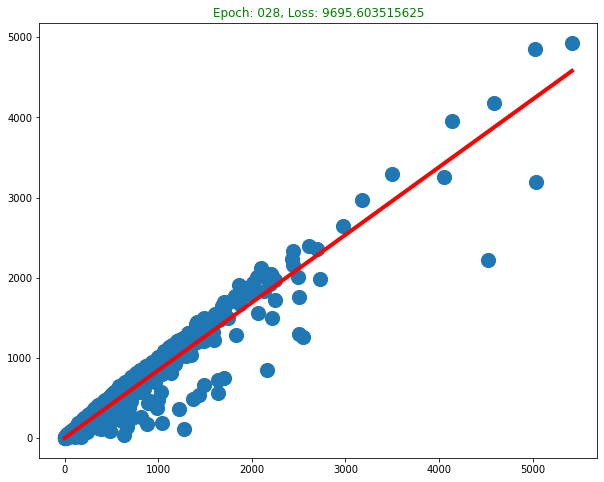

0.8536245 1.565806


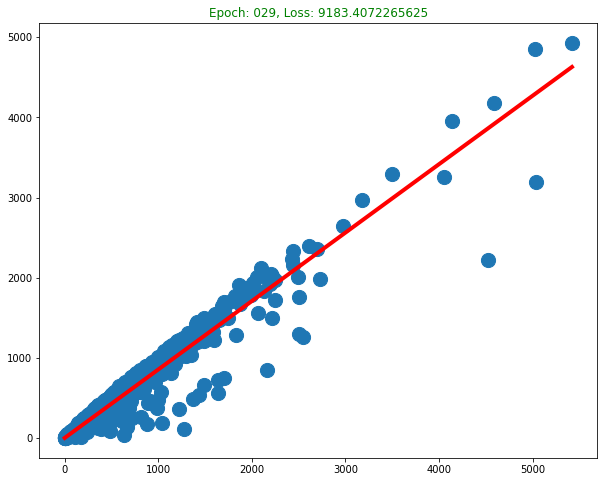

0.86212486 1.580666


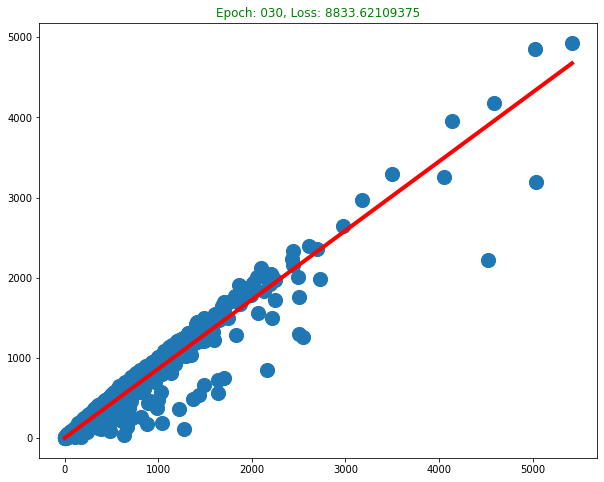

0.8691727 1.5945389


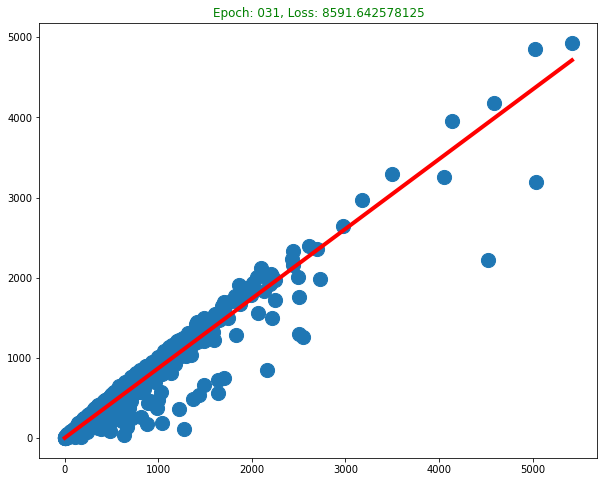

0.8749462 1.6073239


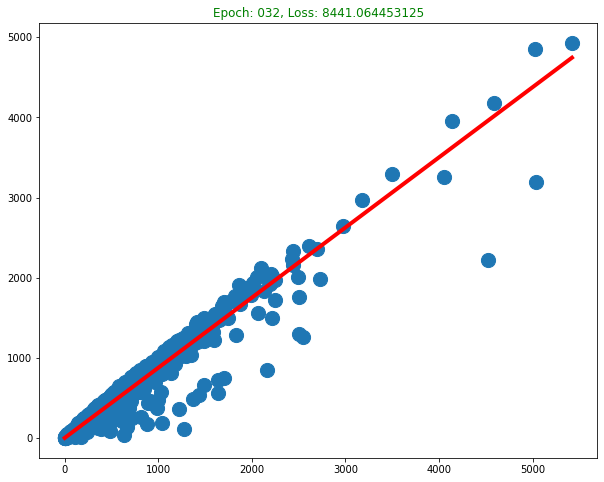

0.87980026 1.6192656


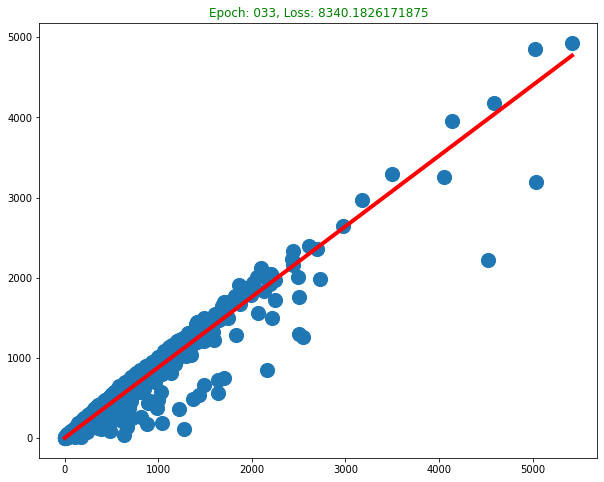

0.88368267 1.6304319


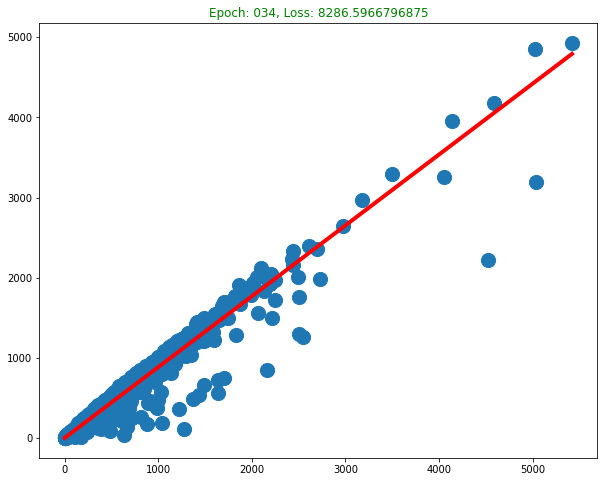

0.88695383 1.6411649


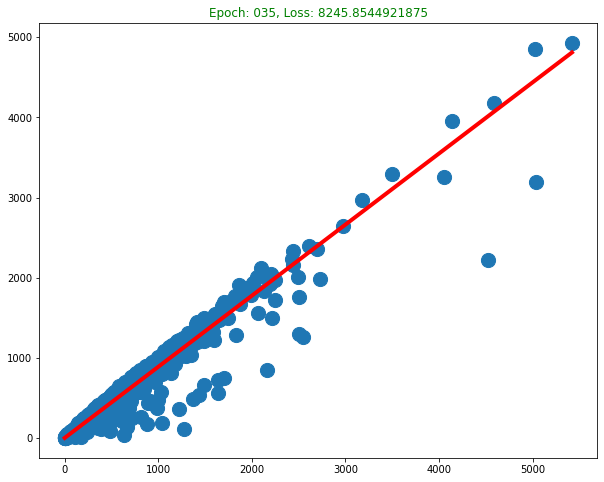

0.8885835 1.65152


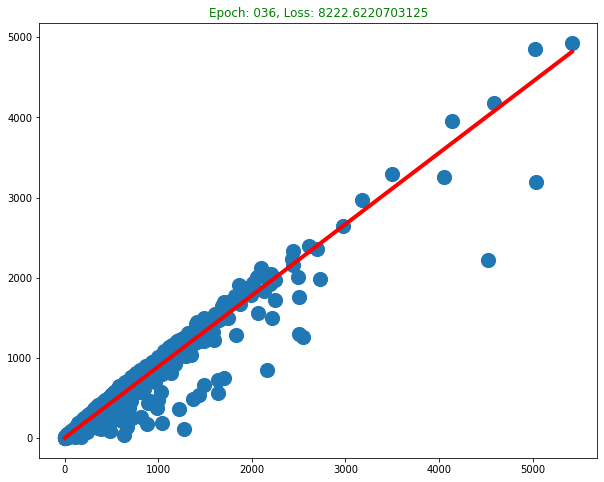

0.89077234 1.6617824


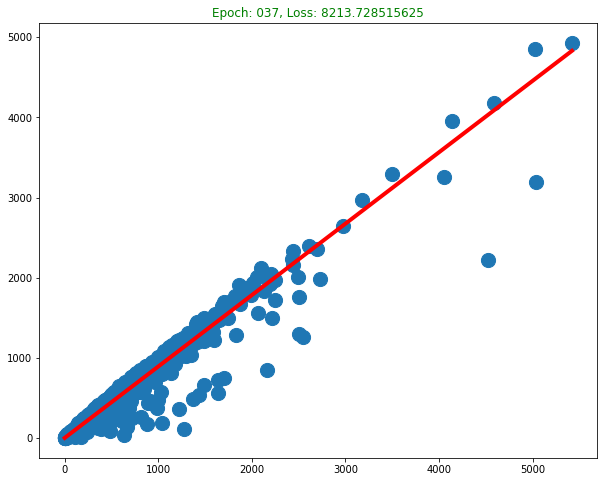

0.8923042 1.671679


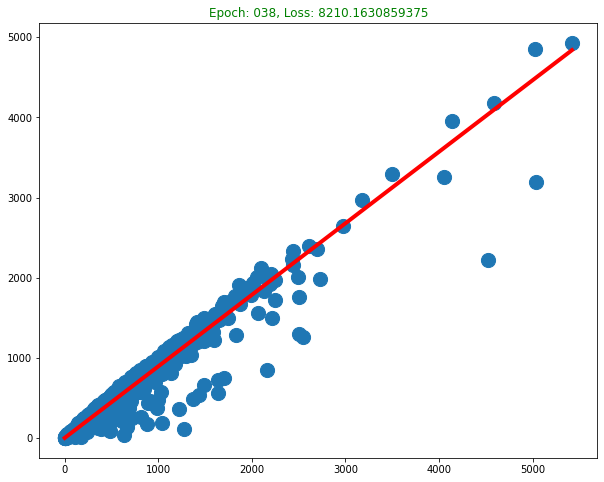

0.8919125 1.681526


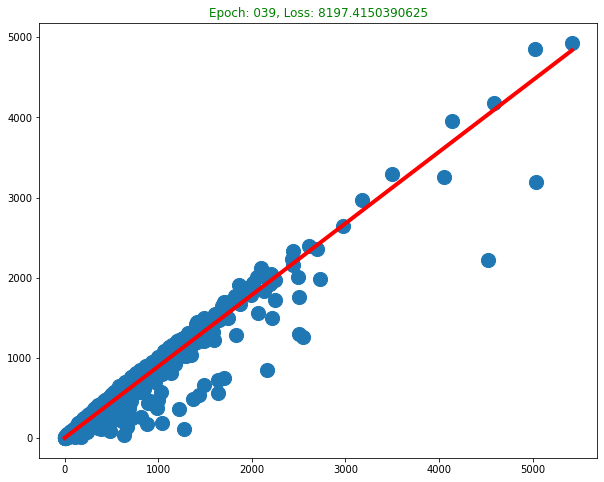

0.89267075 1.692473


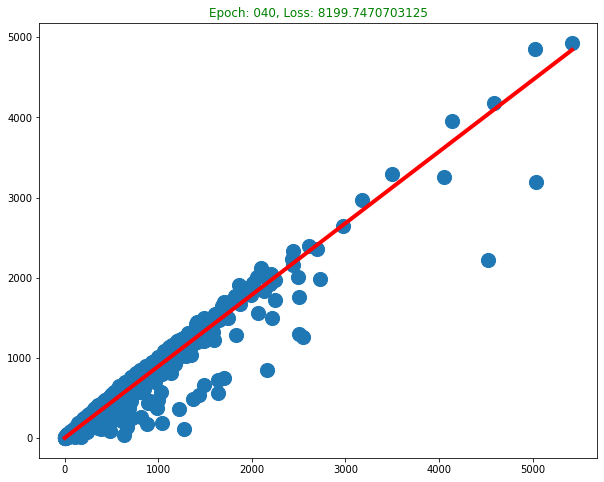

0.89334935 1.7033819


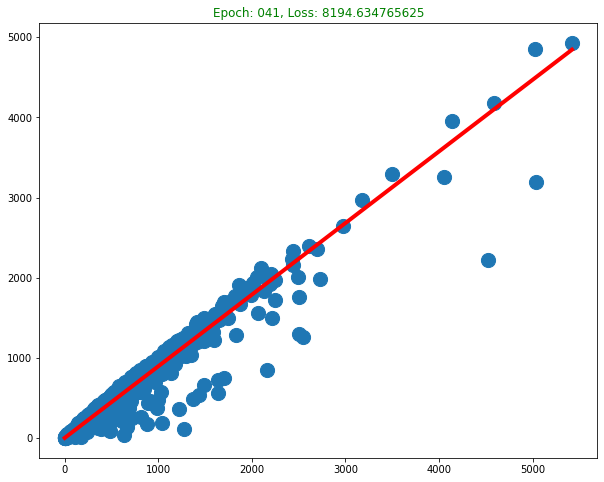

0.8952714 1.7147064


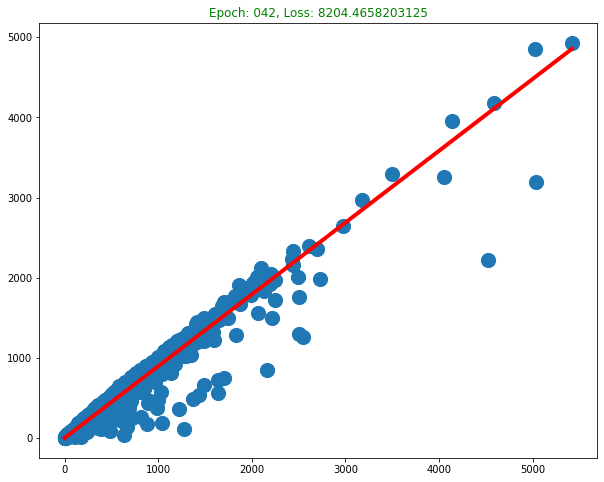

0.8939644 1.7260029


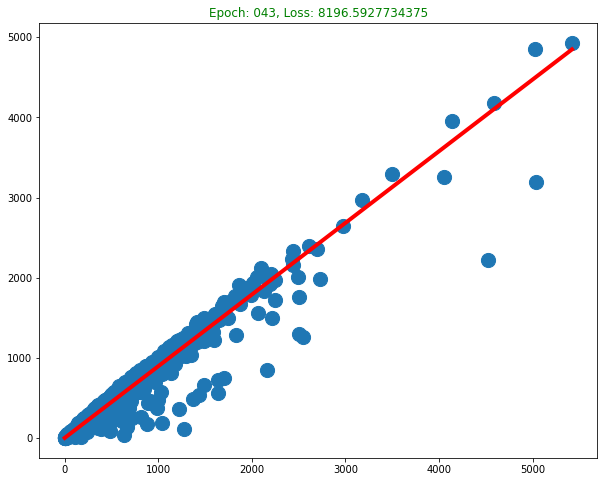

0.8957839 1.7390049


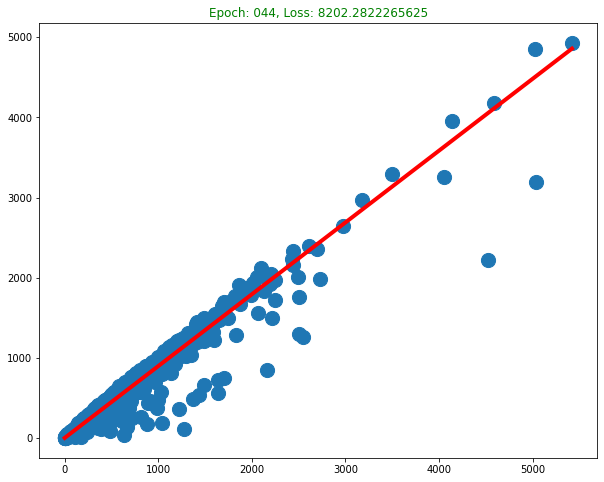

0.89544713 1.7503364


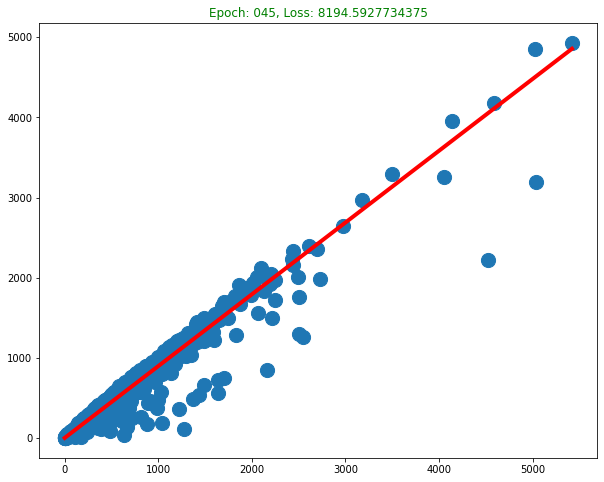

0.8956501 1.7639947


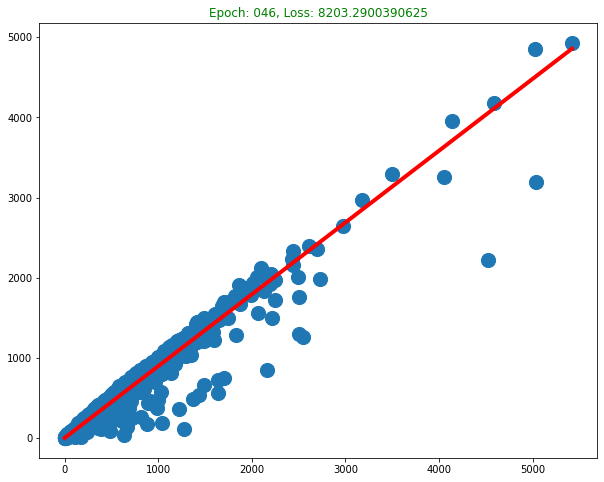

0.895357 1.7767462


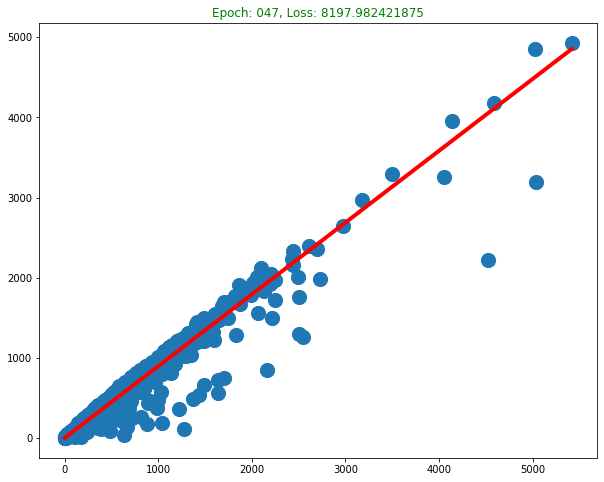

0.89487857 1.7903178


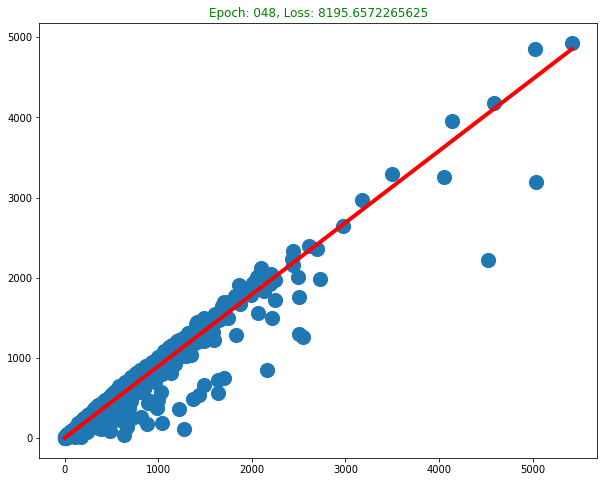

0.8952645 1.8048145


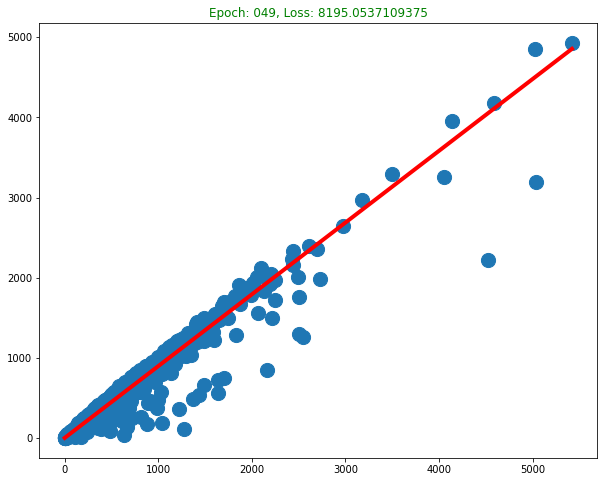

0.8948653 1.8203253


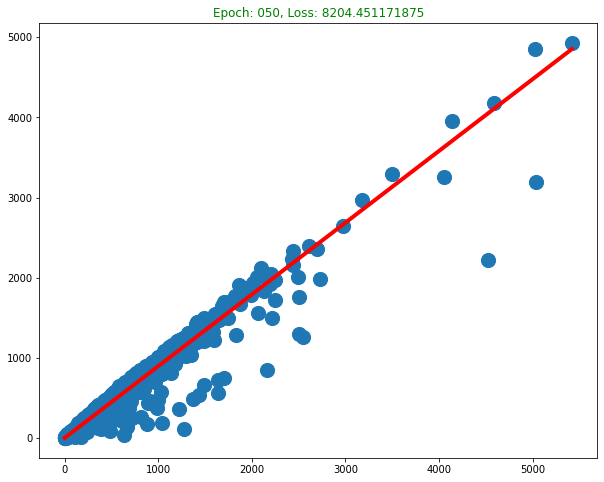

0.8950091 1.836048


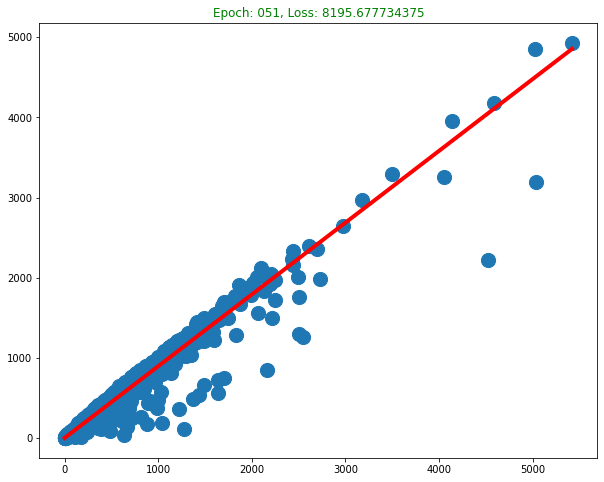

0.8946972 1.8527018


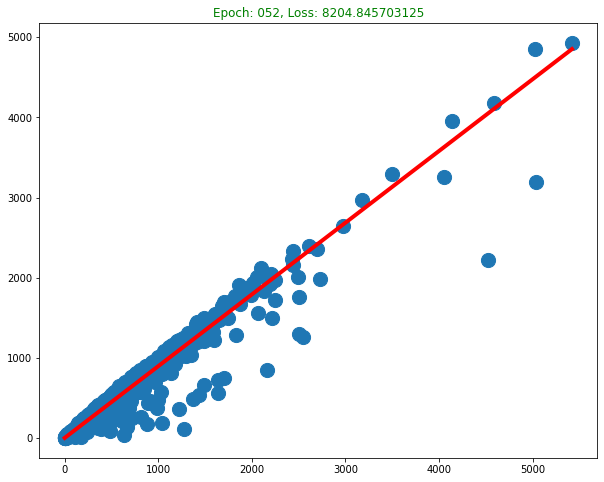

0.896865 1.8694818


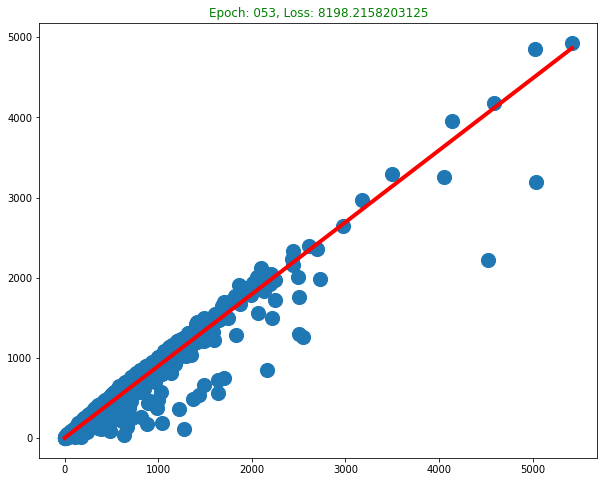

0.89463305 1.8876843


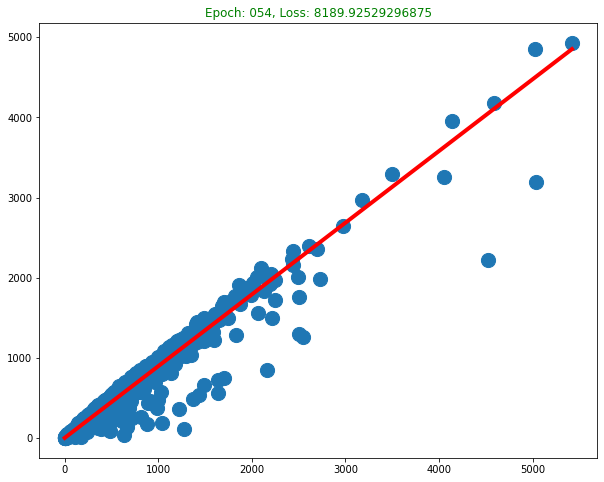

0.8940102 1.9067369


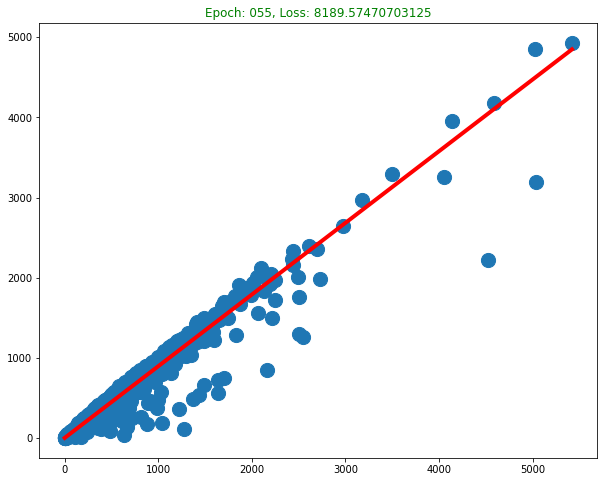

0.89501005 1.9259899


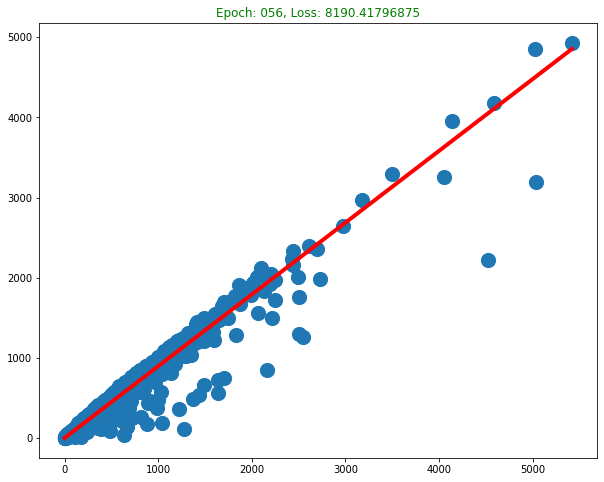

0.89407074 1.9472377


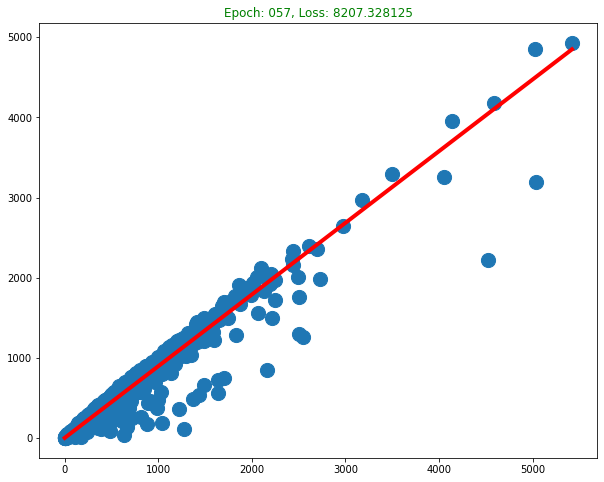

0.89427125 1.96885


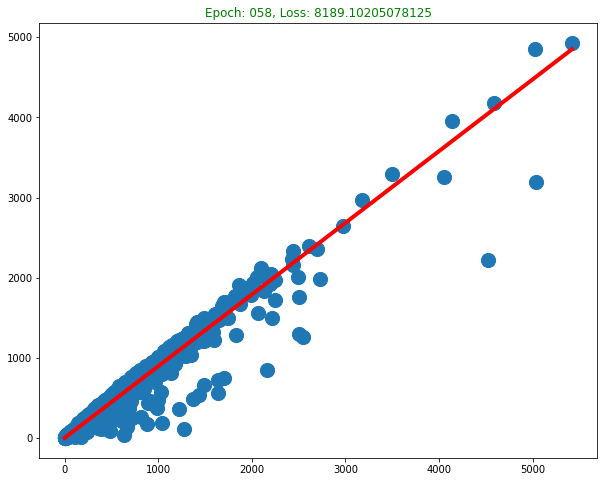

0.8950201 1.992074


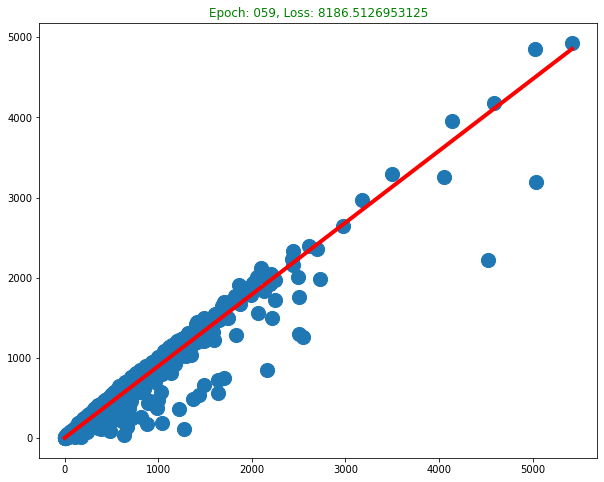

0.89709073 2.017407


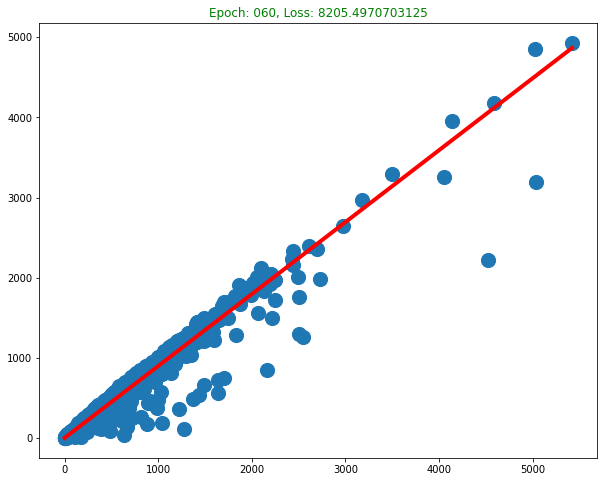

0.8948331 2.038924


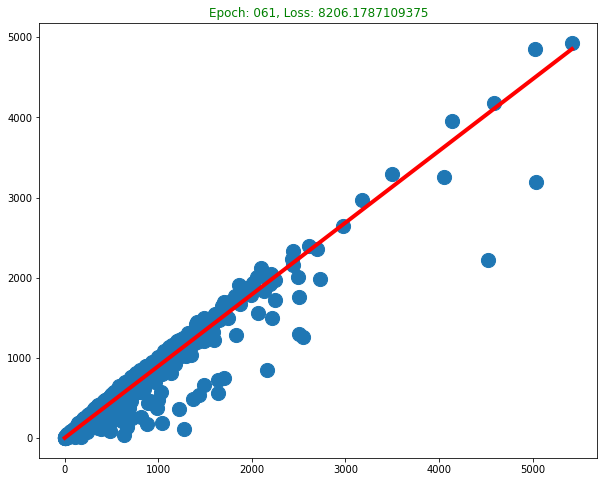

0.89645976 2.064227


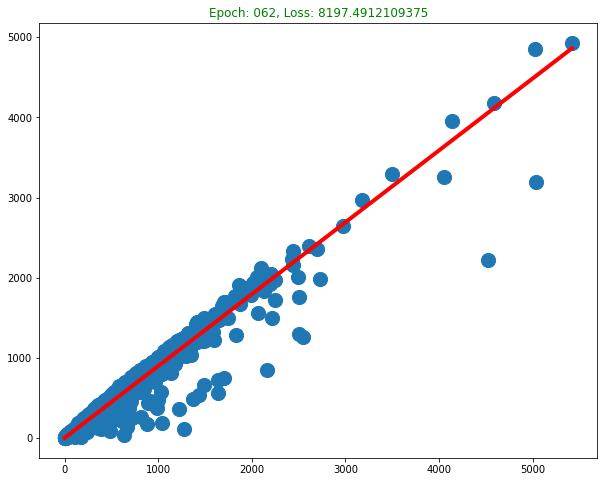

0.8947505 2.0900307


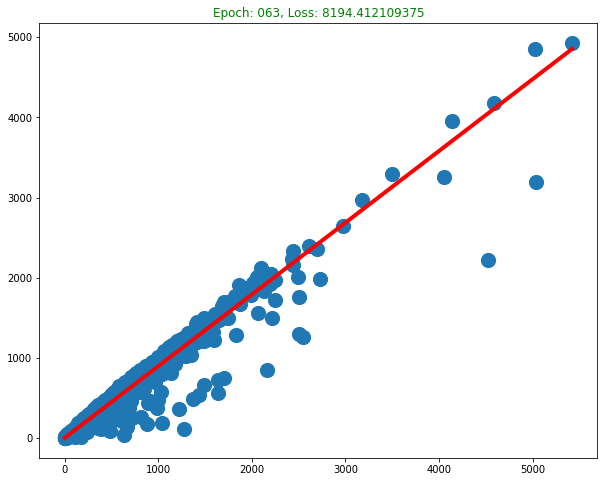

0.8950249 2.1166432


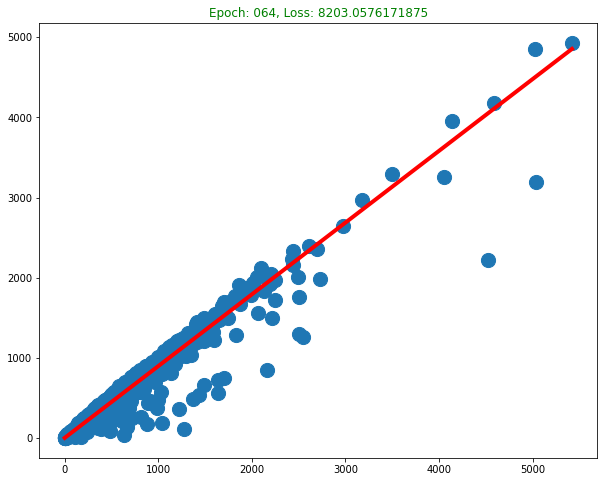

0.8949739 2.145158


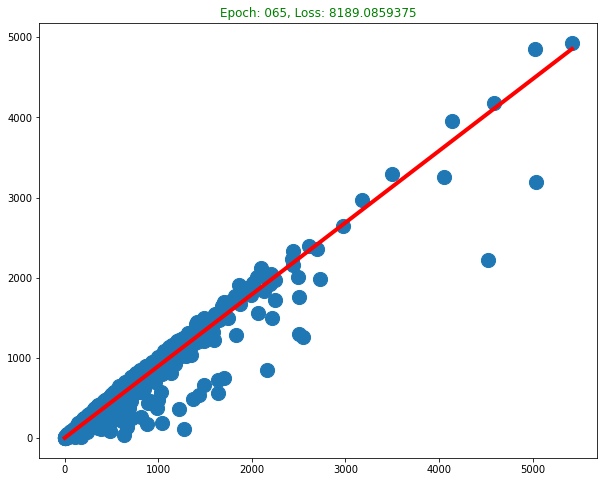

0.8950181 2.1744928


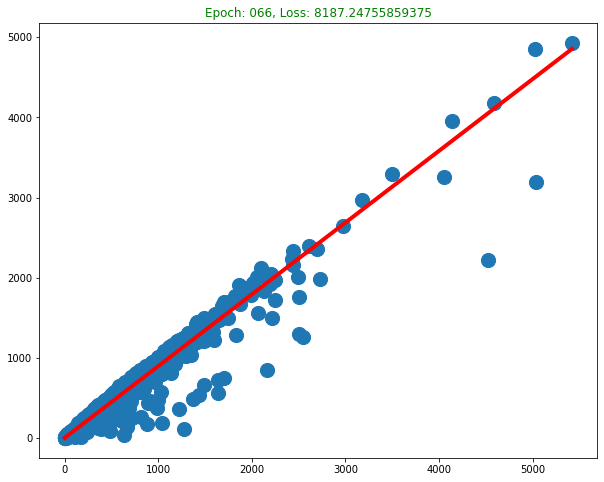

0.8957412 2.2056963


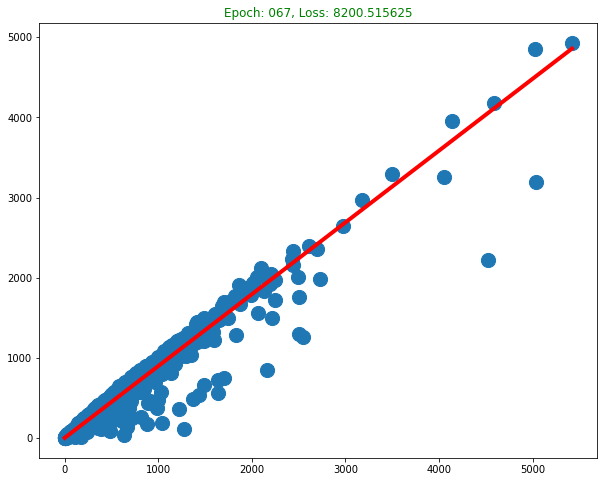

0.89529055 2.2346277


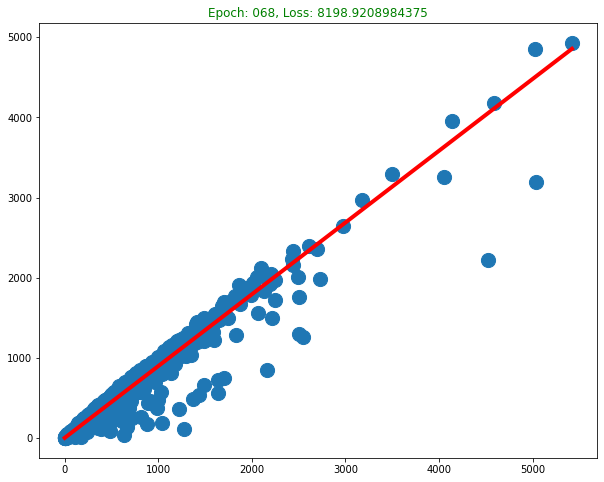

0.895664 2.2663827


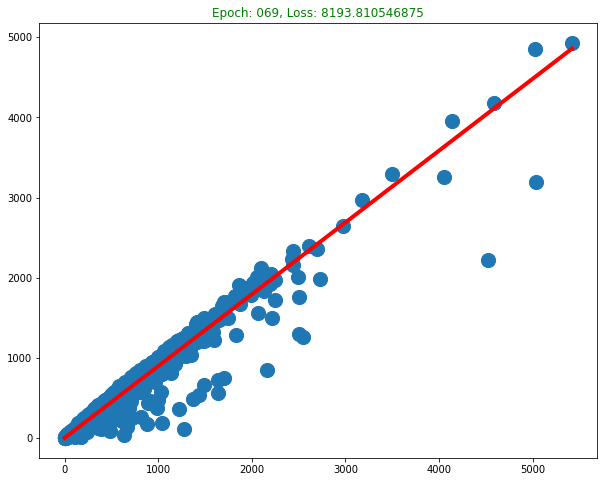

0.89408886 2.2991762


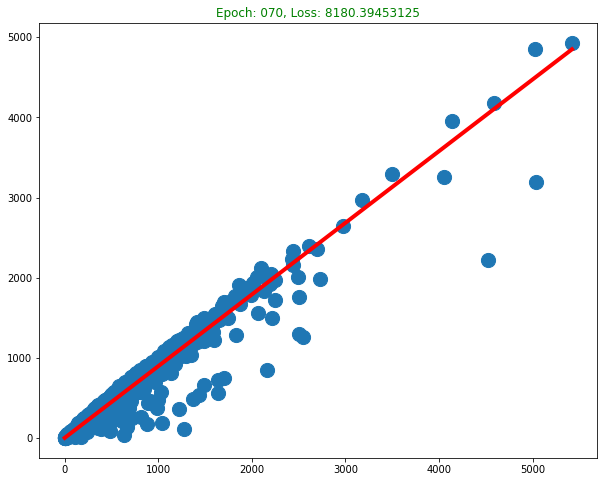

0.89400727 2.3334801


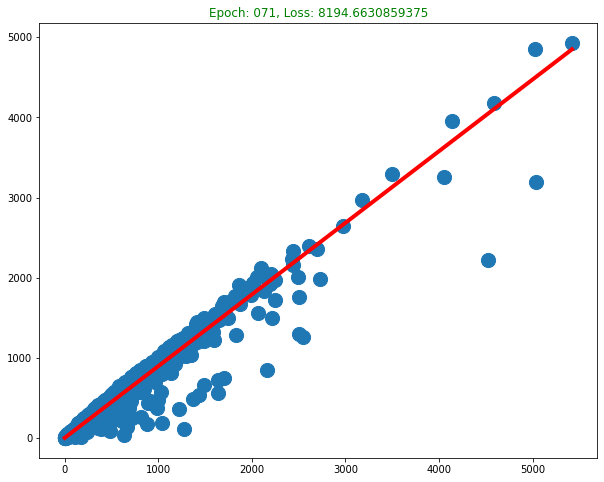

0.89396584 2.3692405


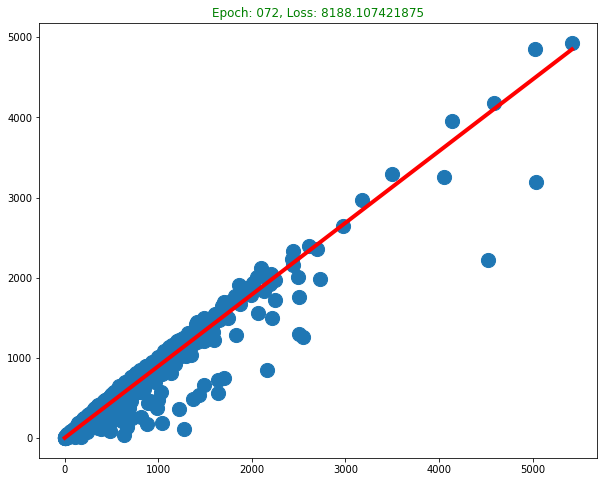

0.89194995 2.400519


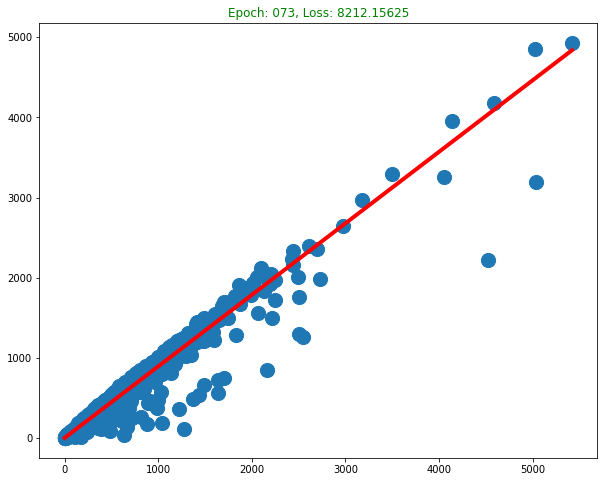

0.8923235 2.4393806


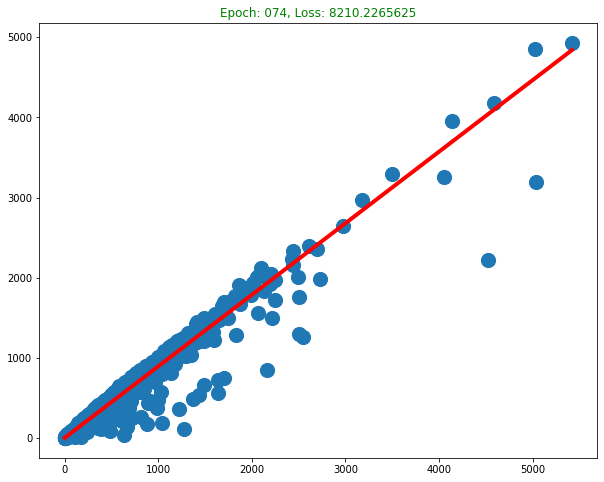

0.8924339 2.4796152


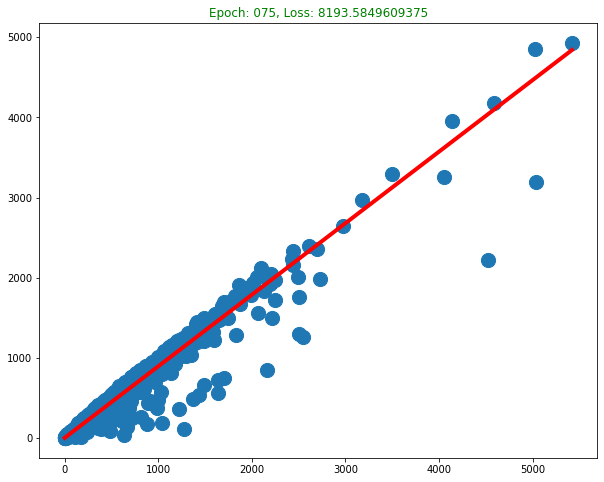

0.8972851 2.5224633


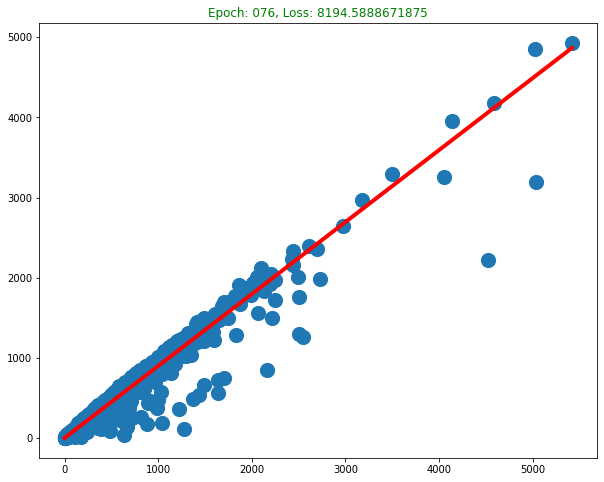

0.8943176 2.5624683


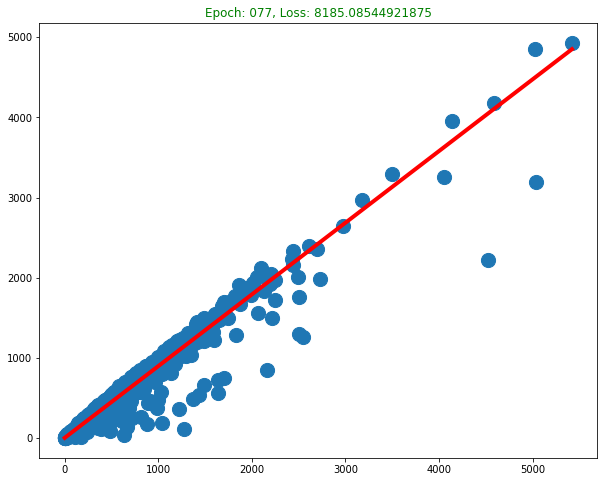

0.89582646 2.605863


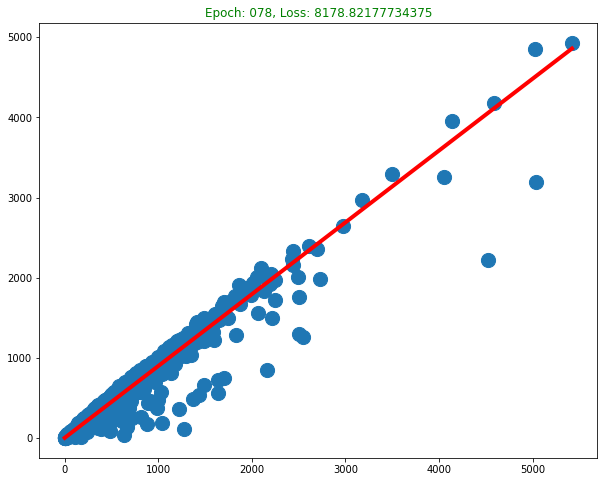

0.896138 2.647266


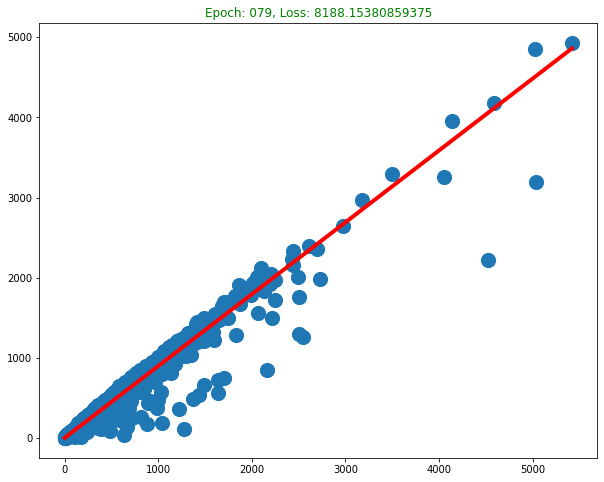

0.89535755 2.6887968


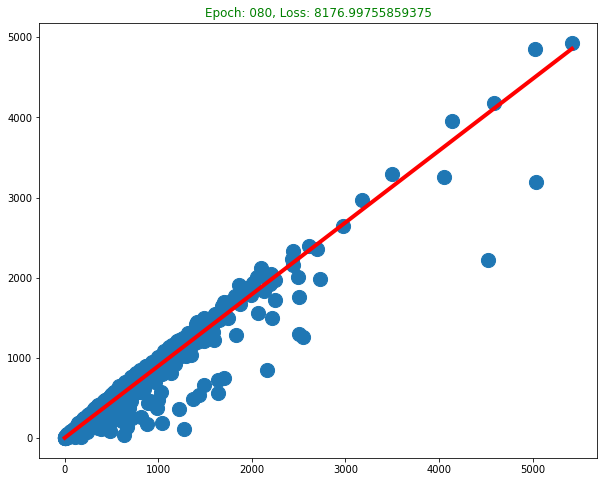

0.8935748 2.7308514


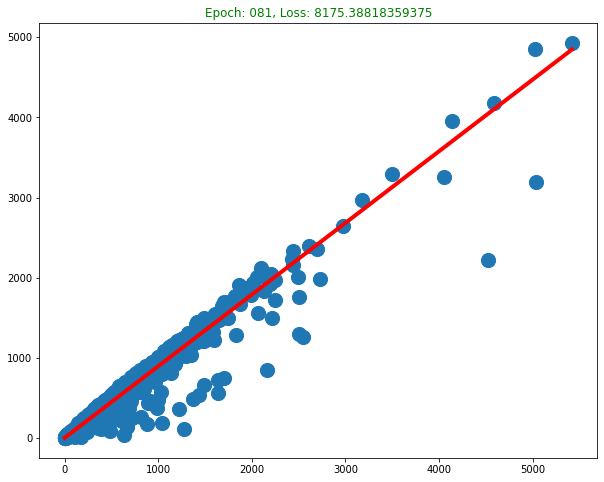

0.8927581 2.7745209


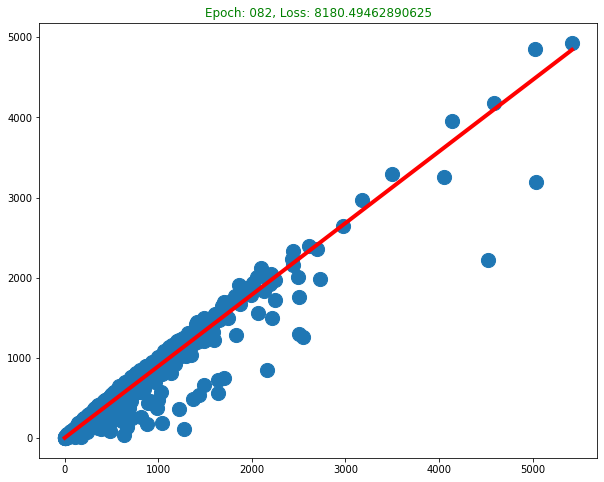

0.8909308 2.8162189


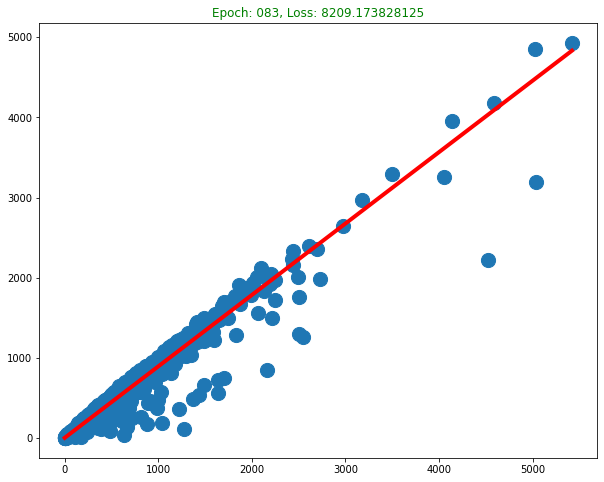

0.8933187 2.8695815


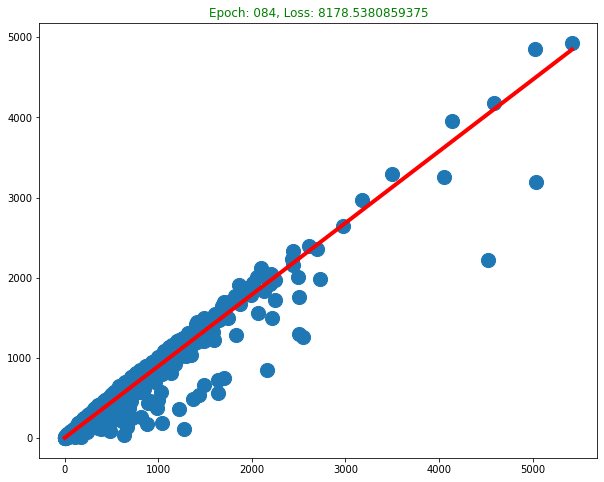

0.8954584 2.913547


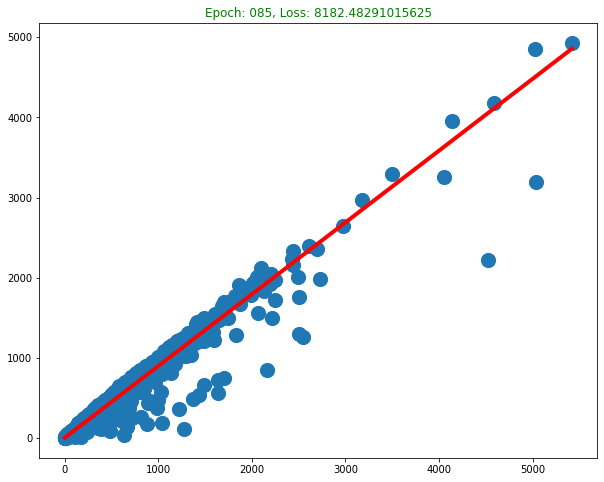

0.89232236 2.9613066


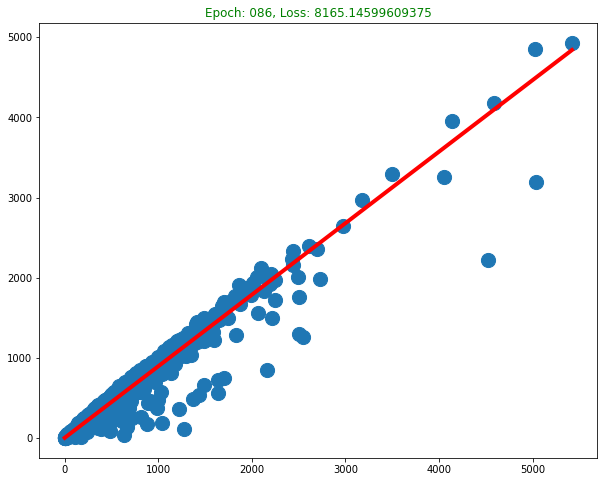

0.89592165 3.010326


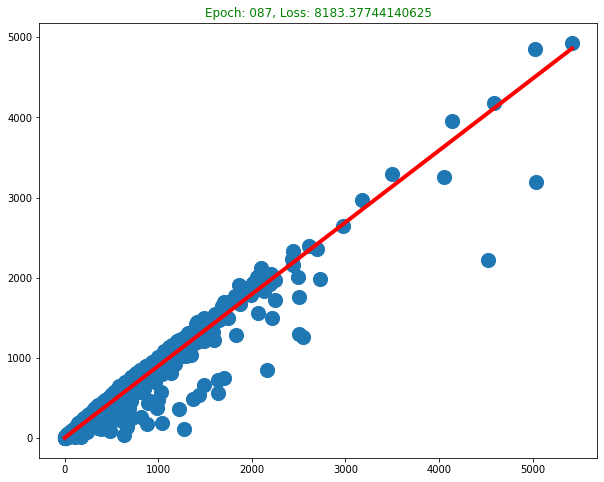

0.8922457 3.0584412


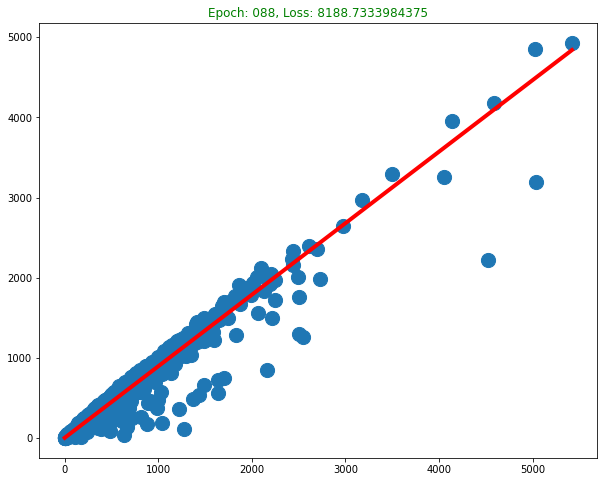

0.8917142 3.11241


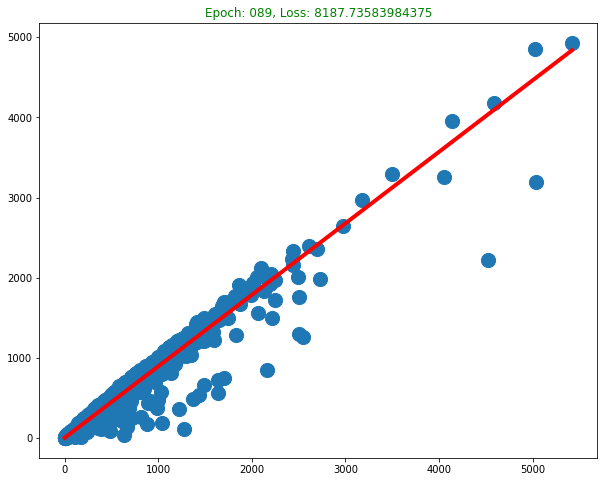

0.8959903 3.1650023


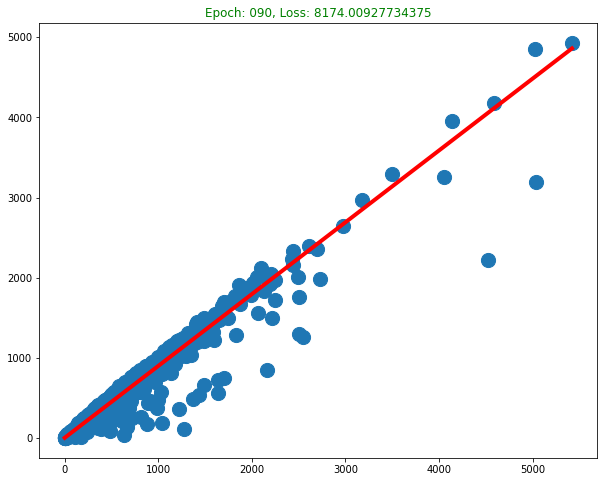

0.8938961 3.2121048


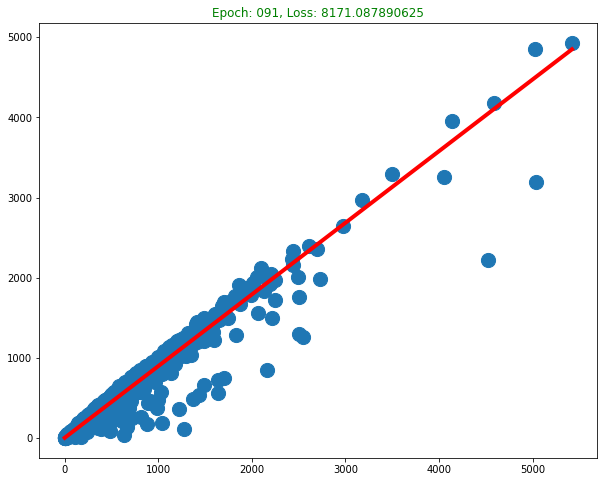

0.89014685 3.2647078


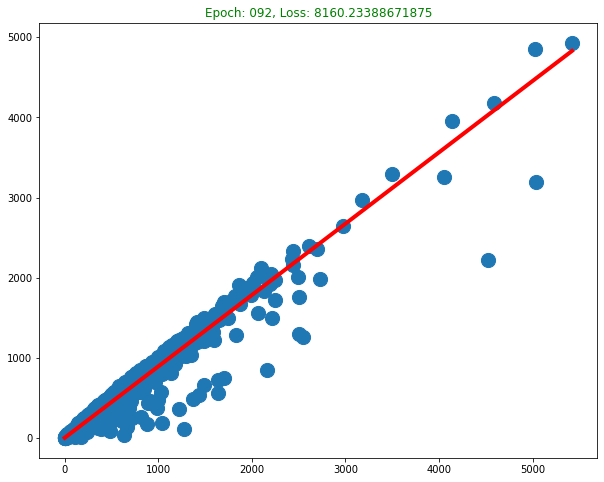

0.8910743 3.3215227


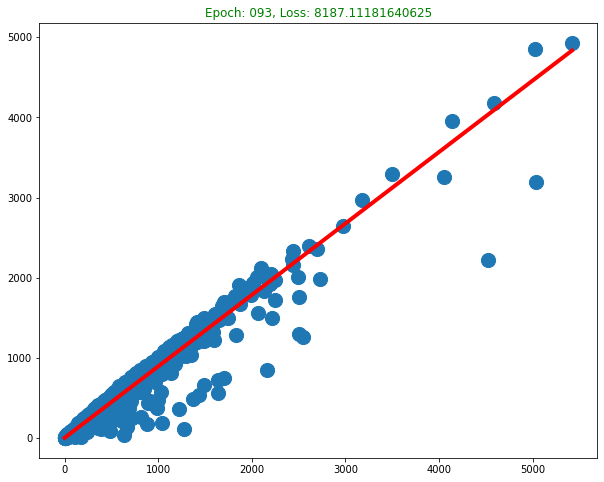

0.89425457 3.3809536


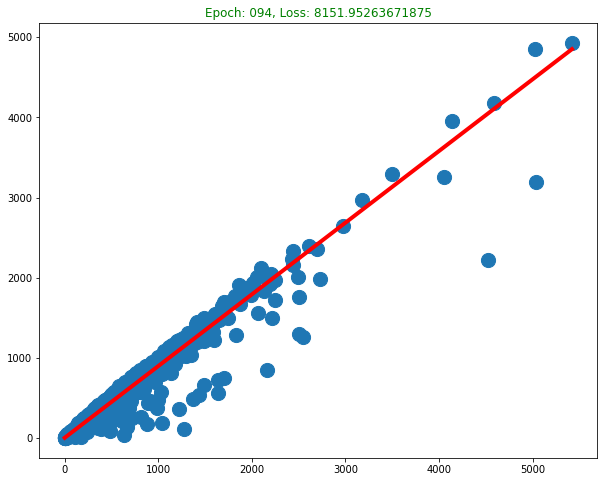

0.89497113 3.4287221


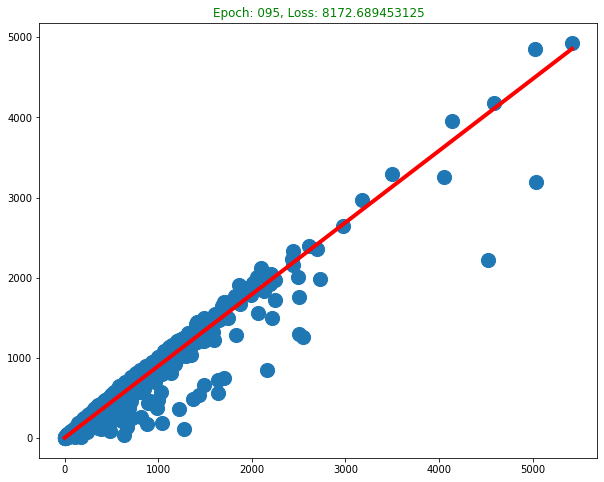

0.8960132 3.4794712


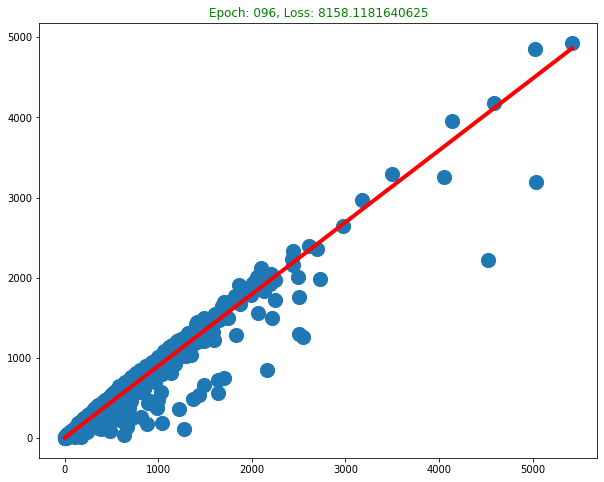

0.88975805 3.5294797


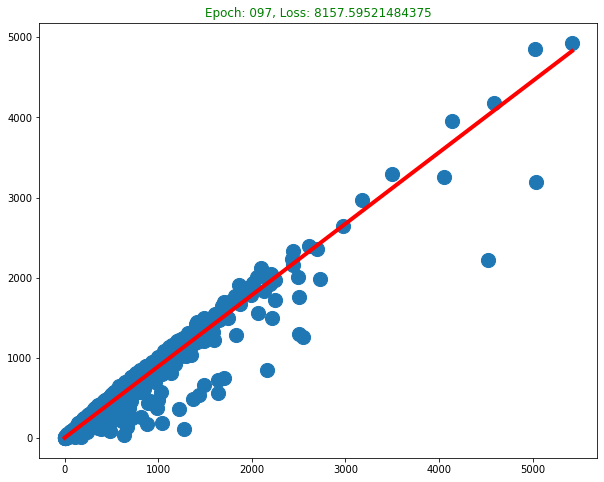

0.89142454 3.5890675


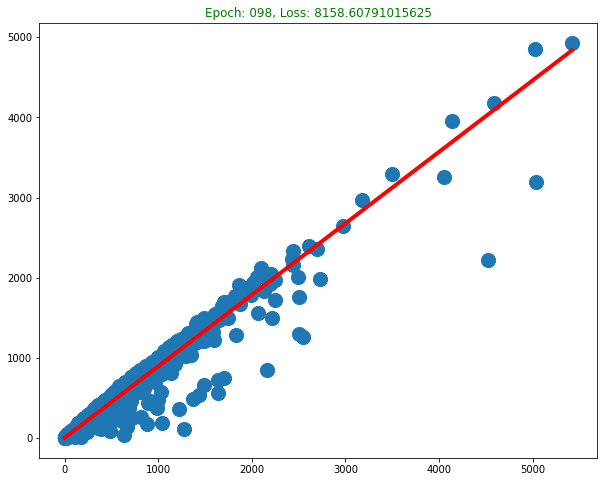

0.892288 3.642586


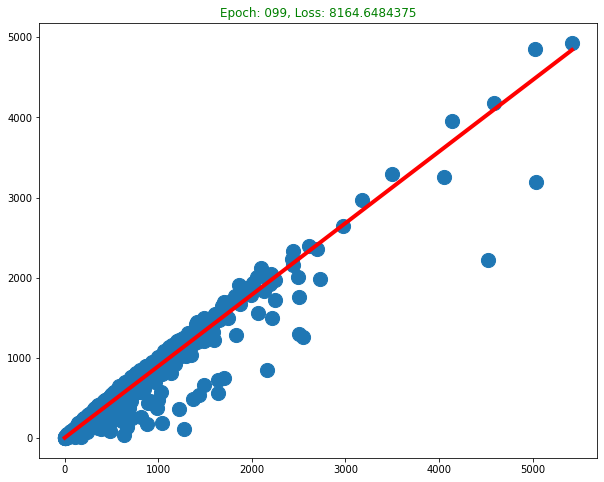

In [103]:
# criando o modelo

# 1) passa uma lista com os layers do seu modelo, cada layer tem o seu numero de units
# pra adicionar outro layer, é como itens de uma lista, coloca virgula e escreve o proximo
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 1, input_shape = [1], name = "jonas")
                             ])

# 2) como calcular o erro do seu modelo (loss) e como melhorar, diminuir esse erro (optimizer)
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))

# 3) colocando os dados no modelo
model.fit(x = x_l, y = y_l, epochs = 100, verbose = 0, callbacks = [CustomCallback()])

In [104]:
# criar o GIF
import os
import imageio

imageio.plugins.freeimage.download()

graph_list = os.listdir("/content/grafico") # lista de arquivos dentro da pasta
graph_list = sorted(graph_list) # coloca os arquivos em ordem alfabetica

images = []

for image_file in graph_list: # pra cada arquivo dentro da pasta,
    image = imageio.imread("/content/grafico/" + image_file) # ler o arquivo e armazenar em uma variavel
    images.append(image) # adicionar a image à lista de imagens

imageio.mimsave("/content/casas.gif", images, "GIF-FI", fps = 10) # fazer um GIF com a lista de imagens

## Mais um pouco sobre graficos

In [106]:
# valores para fazer a regressão
x_l = np.array([1, 2, 3, 4, 5], dtype = float)
y_l = np.array([3, 5, 7, 9, 11], dtype = float)

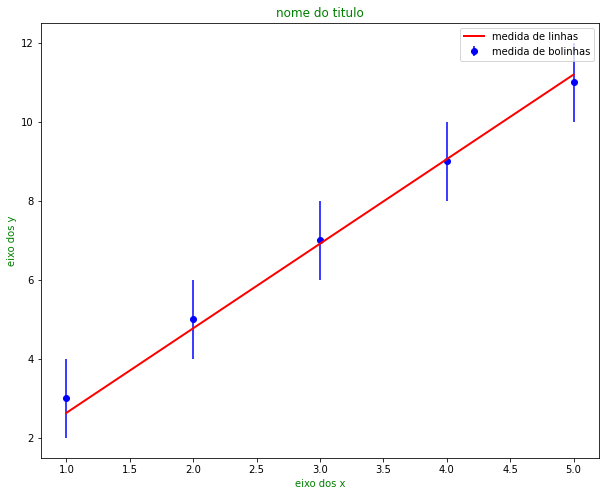

In [107]:
plt.figure( figsize = (10,8))

# desenhar bolinhas azuis (ob) com uma barra de erro de 1
plt.errorbar(x_l, y_l, zorder = 0, yerr = 1, fmt = "ob", label = "medida de bolinhas") 

xlinha = np.linspace(np.amin(x_l), np.amax(x_l), 50)
ylinha = [w * x + b for x in xlinha]

plt.title("nome do titulo", color = "green") # titulo

plt.ylabel("eixo dos y", color = "green") # nome do eixo y
plt.xlabel("eixo dos x", color = "green") # nome do eixo x 

plt.plot(xlinha, ylinha, linewidth = 2, color = "red", zorder = 10, label = "medida de linhas") # zorder indica a ordem em que as coisas aparecem

plt.legend()
plt.show()